In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This line reads your CSV file into a DataFrame
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
### Question 1: Who were the passengers on the Titanic?

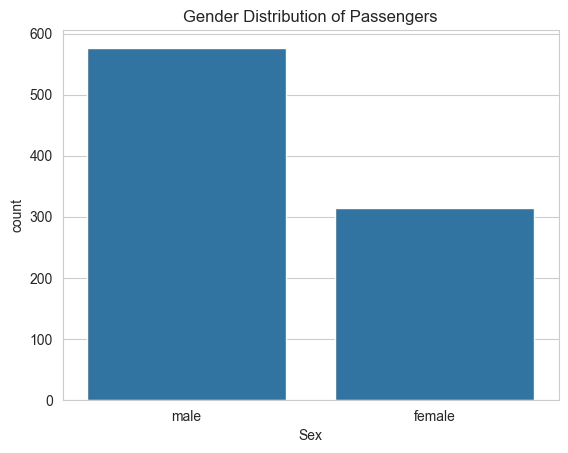

In [8]:
# Set the style of the visuals
sns.set_style('whitegrid')

sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution of Passengers')
plt.show()

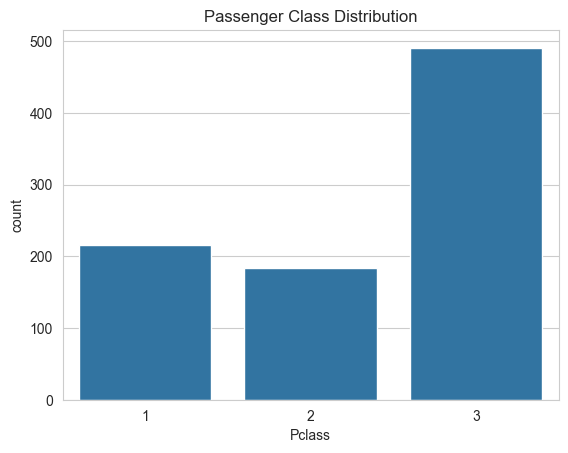

In [9]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

In [10]:
### Question 2: How did gender and class affect survival?


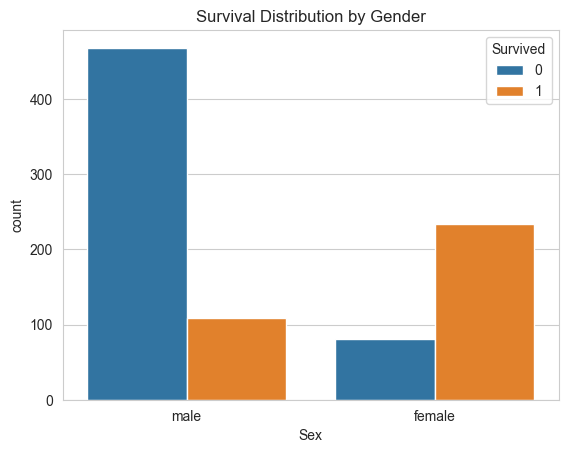

In [11]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Distribution by Gender')
plt.show()

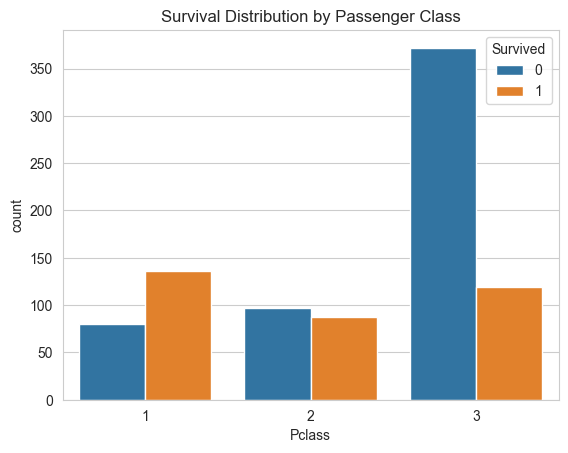

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Distribution by Passenger Class')
plt.show()

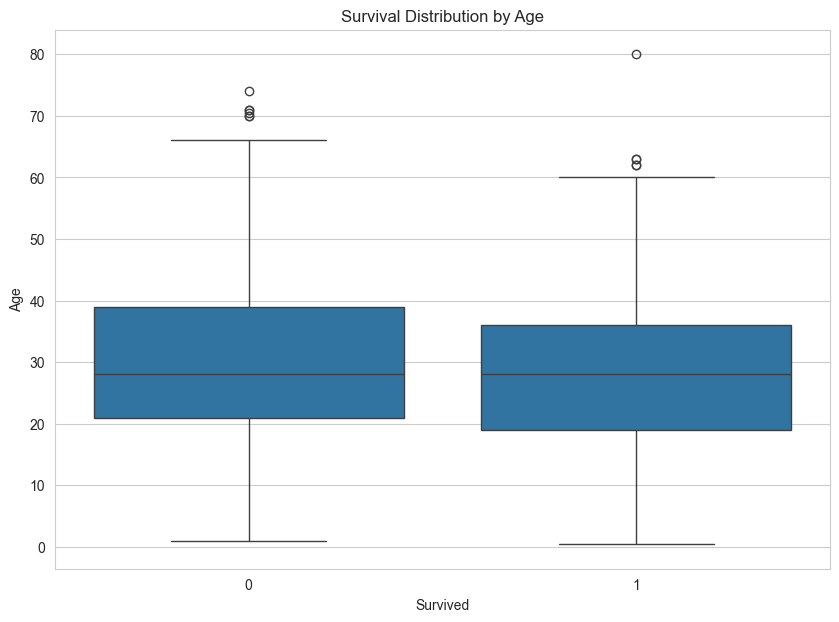

In [13]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival Distribution by Age')
plt.show()

In [14]:
# Calculate the median age
median_age = df['Age'].median()
print(f"The median age is: {median_age}")

# Use the fillna() method to fill missing values.
# inplace=True means we are modifying the DataFrame directly.
df['Age'].fillna(median_age, inplace=True)

The median age is: 28.0


C:\Users\golir\AppData\Local\Temp\ipykernel_19580\2409125932.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [15]:
# The axis=1 tells pandas we want to drop a column, not a row.
df.drop('Cabin', axis=1, inplace=True)


In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
# --- Step 1: Handle final missing values ---
# Drop the two rows where 'Embarked' is missing
df.dropna(inplace=True)


# --- Step 2: Convert text columns to numbers ---
# This technique is called one-hot encoding.
# It creates new columns with 0s and 1s for each category.
sex = pd.get_dummies(df['Sex'], drop_first=True) # drop_first avoids a statistical trap
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

# Add these new numerical columns to our DataFrame
df = pd.concat([df, sex, embarked], axis=1)


# --- Step 3: Clean up old columns ---
# Drop the original text columns and others we don't need
df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


# --- Final Verification ---
# Let's look at our final, model-ready dataset!
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [18]:
# X contains all columns except 'Survived'
X = df.drop('Survived', axis=1)

# y contains only the 'Survived' column
y = df['Survived']

In [19]:
from sklearn.model_selection import train_test_split

# test_size=0.2 means 20% of the data is reserved for testing
# random_state=42 ensures you get the same 'random' split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You can check the number of rows in your training set
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (711, 8)
Shape of X_test: (178, 8)


In [20]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
model = LogisticRegression(max_iter=1000)

# The .fit() method is the "train" button.
# The model learns the relationship between the features (X_train) and the outcome (y_train).
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [21]:
from sklearn.metrics import accuracy_score, classification_report

# Use the trained model to make predictions on the test data
predictions = model.predict(X_test)

# Calculate the overall accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print a more detailed report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Model Accuracy: 78.09%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



In [22]:
# Select the first row
first_row = df.iloc[0]
print(first_row)


Survived        0
Pclass          3
Age          22.0
SibSp           1
Parch           0
Fare         7.25
male         True
Q           False
S            True
Name: 0, dtype: object


In [23]:
# Select rows 0, 1, and 2
first_three_rows = df.iloc[0:3]
print(first_three_rows)

   Survived  Pclass   Age  SibSp  Parch     Fare   male      Q      S
0         0       3  22.0      1      0   7.2500   True  False   True
1         1       1  38.0      1      0  71.2833  False  False  False
2         1       3  26.0      0      0   7.9250  False  False   True


In [24]:
female_passengers = df.loc[df['male'] == False]
print(female_passengers)

     Survived  Pclass   Age  SibSp  Parch     Fare   male      Q      S
1           1       1  38.0      1      0  71.2833  False  False  False
2           1       3  26.0      0      0   7.9250  False  False   True
3           1       1  35.0      1      0  53.1000  False  False   True
8           1       3  27.0      0      2  11.1333  False  False   True
9           1       2  14.0      1      0  30.0708  False  False  False
..        ...     ...   ...    ...    ...      ...    ...    ...    ...
880         1       2  25.0      0      1  26.0000  False  False   True
882         0       3  22.0      0      0  10.5167  False  False   True
885         0       3  39.0      0      5  29.1250  False   True  False
887         1       1  19.0      0      0  30.0000  False  False   True
888         0       3  28.0      1      2  23.4500  False  False   True

[312 rows x 9 columns]


In [26]:
first_class_passengers = df[df['Pclass'] == 1]
print(first_class_passengers.head())

    Survived  Pclass   Age  SibSp  Parch     Fare   male      Q      S
1          1       1  38.0      1      0  71.2833  False  False  False
3          1       1  35.0      1      0  53.1000  False  False   True
6          0       1  54.0      0      0  51.8625   True  False   True
11         1       1  58.0      0      0  26.5500  False  False   True
23         1       1  28.0      0      0  35.5000   True  False   True


In [27]:
survived_males = df[(df['Survived'] == 1) & (df['male'] == True)]

In [29]:
survived_males = df[(df['Survived'] == 1) & (df['male'] == True)]
print(survived_males.head())

    Survived  Pclass   Age  SibSp  Parch     Fare  male      Q      S
17         1       2  28.0      0      0  13.0000  True  False   True
21         1       2  34.0      0      0  13.0000  True  False   True
23         1       1  28.0      0      0  35.5000  True  False   True
36         1       3  28.0      0      0   7.2292  True  False  False
55         1       1  28.0      0      0  35.5000  True  False   True


In [30]:
# Group by the 'Pclass' column, select the 'Fare' column, and calculate the mean
average_fare_by_class = df.groupby('Pclass')['Fare'].mean()

print("Average fare by passenger class:")
print(average_fare_by_class)

Average fare by passenger class:
Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64
